# CHEM277B Homework 2
### Trevor Oldham
### UC Berkeley CoC

### Problem 1
#### Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#### Function Definition

In [2]:
def schwefel(x):
    return 418.9829*len(x) - np.sum(x*np.sin([(np.power(abs(x), [0.5]))]))

In [3]:
#testing schwefel function
np.random.seed(84320320)
x = np.random.rand(10)
x = 500 - 1000*x
print(x)
schwefel(x)

[ 164.06669666 -351.21235073  137.87670544 -223.50274351   -1.17488227
  -95.97841201   45.1296303  -479.69762439   80.50953893  251.0819775 ]


4356.238421130017

### (A)

In [4]:
def SA(solution,evaluation,delta,boundary,cooling_schedule):
    """ Simulated Annealing for minimization
    solution: np.array. Initial guess of solution
    evaluation: func. Function to evaluate solution
    delta: float. Magnitude of random displacement
    boundary: array of int/float. [lowerbound,upperbound]
    cooling_schedule: np.array. An array of tempretures for simulated annealing
    """
    k = 1
    best_solution=solution.copy()
    lowest_eval=evaluation(best_solution)
    for idx,temp in enumerate(cooling_schedule):
        if idx%500==0:
            print("%d/%d   temp:%f"%(idx,len(cooling_schedule),temp))
        for n in range(len(solution)):
            trial=solution.copy()
            trial[n]+=delta*(2*np.random.random()-1)
            if trial[n]>=boundary[0] and trial[n]<=boundary[1]:
                #fill in acceptance criterion
                beta = 1/(k*temp)
                urn = np.random.random()
                p_accept = min(1, math.exp(-beta*(evaluation(trial) - evaluation(solution))))
                if p_accept == 1 or urn < p_accept:
                    solution=trial
                    if evaluation(solution)<lowest_eval:
                        #update solution here
                        best_solution = solution
                        lowest_eval = evaluation(best_solution)
    return {"solution":best_solution,"evaluation":lowest_eval}

In [5]:
#defining a function to generate a linear cooling schedule
def cooling_schedule_linear(start_temp, end_temp):
    t = start_temp;
    tsa_array = list([t])
    while t > end_temp:
        t = t - 0.5
        tsa_array.append(t)
    return np.asarray(tsa_array)


In [6]:
#setting the cooling schedule 1 and 2
cooling_1 = cooling_schedule_linear(3000, 30)
cooling_1

cooling_2 = cooling_schedule_linear(3000, 10)
cooling_2

array([3000. , 2999.5, 2999. , ...,   11. ,   10.5,   10. ])

In [7]:
#setting delta and boundary conditions
delta = 0.5
boundary = [-500, 500]

#setting x vector for starting point
x = np.random.rand(10)
x = 500 - 1000*x
print(x)
schwefel(x)

[ 413.46980319 -102.44598767  454.25940124    6.47836124  268.21935103
   18.32382419 -214.11578832  206.2688498  -439.51655197 -466.30688437]


4150.342666041169

In [8]:
#running the simulated annealing function with first cooling schedule 3 times
SA(x,schwefel,delta,boundary,cooling_1)

0/5941   temp:3000.000000
500/5941   temp:2750.000000
1000/5941   temp:2500.000000
1500/5941   temp:2250.000000
2000/5941   temp:2000.000000
2500/5941   temp:1750.000000
3000/5941   temp:1500.000000
3500/5941   temp:1250.000000
4000/5941   temp:1000.000000
4500/5941   temp:750.000000
5000/5941   temp:500.000000
5500/5941   temp:250.000000


{'solution': array([ 420.54535877, -107.6033961 ,  454.61746994,  -11.77635797,
         267.86698683,   10.33342612, -207.75858815,  201.71195015,
        -442.73738255, -465.36887298]),
 'evaluation': 4110.570531693231}

In [9]:
SA(x,schwefel,delta,boundary,cooling_1)

0/5941   temp:3000.000000
500/5941   temp:2750.000000
1000/5941   temp:2500.000000
1500/5941   temp:2250.000000
2000/5941   temp:2000.000000
2500/5941   temp:1750.000000
3000/5941   temp:1500.000000
3500/5941   temp:1250.000000
4000/5941   temp:1000.000000
4500/5941   temp:750.000000
5000/5941   temp:500.000000
5500/5941   temp:250.000000


{'solution': array([ 424.70326129, -110.32702021,  423.64608355,  -10.36154531,
         253.84715884,    6.64858586, -228.0251819 ,  200.81515143,
        -455.99349353, -482.57095924]),
 'evaluation': 3521.6105354568244}

In [10]:
SA(x,schwefel,delta,boundary,cooling_1)

0/5941   temp:3000.000000
500/5941   temp:2750.000000
1000/5941   temp:2500.000000
1500/5941   temp:2250.000000
2000/5941   temp:2000.000000
2500/5941   temp:1750.000000
3000/5941   temp:1500.000000
3500/5941   temp:1250.000000
4000/5941   temp:1000.000000
4500/5941   temp:750.000000
5000/5941   temp:500.000000
5500/5941   temp:250.000000


{'solution': array([ 419.2443765 ,  -98.70646143,  449.34052457,  -24.24788298,
         243.28861969,   19.29530961, -188.66436837,  192.55898783,
        -443.23011946, -457.38739437]),
 'evaluation': 3975.557186565918}

In [11]:
#running the simulated annealing function with second cooling schedule 3 times
SA(x,schwefel,delta,boundary,cooling_2)

0/5981   temp:3000.000000
500/5981   temp:2750.000000
1000/5981   temp:2500.000000
1500/5981   temp:2250.000000
2000/5981   temp:2000.000000
2500/5981   temp:1750.000000
3000/5981   temp:1500.000000
3500/5981   temp:1250.000000
4000/5981   temp:1000.000000
4500/5981   temp:750.000000
5000/5981   temp:500.000000
5500/5981   temp:250.000000


{'solution': array([ 414.82747161,  -71.48955706,  418.74894422,   38.0055785 ,
         240.17564994,  -11.19733027, -245.32248657,  223.38977796,
        -450.35345148, -473.35044708]),
 'evaluation': 3648.523880129394}

In [12]:
SA(x,schwefel,delta,boundary,cooling_2)

0/5981   temp:3000.000000
500/5981   temp:2750.000000
1000/5981   temp:2500.000000
1500/5981   temp:2250.000000
2000/5981   temp:2000.000000
2500/5981   temp:1750.000000
3000/5981   temp:1500.000000
3500/5981   temp:1250.000000
4000/5981   temp:1000.000000
4500/5981   temp:750.000000
5000/5981   temp:500.000000
5500/5981   temp:250.000000


{'solution': array([ 397.95644995,  -45.96171229,  422.28607782,   11.00637004,
         265.58304576,    6.81609813, -239.64000416,  206.06046415,
        -441.1403418 , -469.78228441]),
 'evaluation': 3951.8382603554255}

In [13]:
SA(x,schwefel,delta,boundary,cooling_2)

0/5981   temp:3000.000000
500/5981   temp:2750.000000
1000/5981   temp:2500.000000
1500/5981   temp:2250.000000
2000/5981   temp:2000.000000
2500/5981   temp:1750.000000
3000/5981   temp:1500.000000
3500/5981   temp:1250.000000
4000/5981   temp:1000.000000
4500/5981   temp:750.000000
5000/5981   temp:500.000000
5500/5981   temp:250.000000


{'solution': array([ 424.73966429, -117.7244095 ,  445.82669176,    9.49371144,
         265.41174164,   36.49145358, -206.16906912,  205.82552857,
        -447.29960798, -466.03731498]),
 'evaluation': 3984.212013032938}

The CSA algorithm is run three times for each linear cooling schedule starting from the same starting point x which is generated randomly. The algorithm returns a different evaluation at the end of each run, but examination of the end vector shows that the end vector is relatively close to the starting vector, and each time the algorithm is run returns vectors that are close to one another in most dimensions except for a few. One could try running the algorithm from different starting points to achieve more results which could be more effective in finding the global minimum. Cooling to a lower temperature results in evaluations which are closer to one another, at least from a cursory analysis of the three examples. Each algorith has the potential to get trapped in a local minimum, which can be tuned by finding a more appropriate value for the hyperparameter k. Previously, I had used k = 1/start_temp and found it to be more effective in finding smaller minima but in these examples I used k = 1.

### (B)

In [14]:
#defining a function to generate a logarithmic cooling schedule
def cooling_schedule_log(start_temp, sigma, count):
    t = start_temp;
    k = 1
    tsa_array = list([t])
    while k < count:
        t = start_temp/(1 + start_temp * math.log(1 + k)/(3*sigma))
        tsa_array.append(t)
        k += 1
    return np.asarray(tsa_array)

In [15]:
#setting the cooling schedule 1 and 2
log_cooling_1 = cooling_schedule_log(3000, 1000, 6000)
print(log_cooling_1)

log_cooling_2 = cooling_schedule_log(6000, 1000, 6000)
print(log_cooling_2)

[3000.         1771.84832745 1429.51607412 ...  309.30445456  309.29913836
  309.29382324]
[6000.         2514.35870518 1876.6276359  ...  326.1159752   326.1100654
  326.10415681]


In [16]:
SA(x,schwefel,delta,boundary,log_cooling_1)

0/6000   temp:3000.000000
500/6000   temp:415.707877
1000/6000   temp:379.326466
1500/6000   temp:360.842054
2000/6000   temp:348.780336
2500/6000   temp:339.964687
3000/6000   temp:333.085339
3500/6000   temp:327.482176
4000/6000   temp:322.778491
4500/6000   temp:318.740173
5000/6000   temp:315.212364
5500/6000   temp:312.087616


{'solution': array([ 406.6341022 , -123.92143031,  428.38740178,    7.06994816,
         278.74761155,   27.44883576, -229.51863783,  208.23619756,
        -470.95041306, -465.10331868]),
 'evaluation': 3763.184715827042}

In [17]:
SA(x,schwefel,delta,boundary,log_cooling_1)

0/6000   temp:3000.000000
500/6000   temp:415.707877
1000/6000   temp:379.326466
1500/6000   temp:360.842054
2000/6000   temp:348.780336
2500/6000   temp:339.964687
3000/6000   temp:333.085339
3500/6000   temp:327.482176
4000/6000   temp:322.778491
4500/6000   temp:318.740173
5000/6000   temp:315.212364
5500/6000   temp:312.087616


{'solution': array([ 402.38419716, -100.27686785,  454.18902261,    5.57254254,
         258.08338327,    5.06908684, -195.87325346,  213.78687954,
        -429.91024963, -473.54152474]),
 'evaluation': 4076.213454473056}

In [18]:
SA(x,schwefel,delta,boundary,log_cooling_1)

0/6000   temp:3000.000000
500/6000   temp:415.707877
1000/6000   temp:379.326466
1500/6000   temp:360.842054
2000/6000   temp:348.780336
2500/6000   temp:339.964687
3000/6000   temp:333.085339
3500/6000   temp:327.482176
4000/6000   temp:322.778491
4500/6000   temp:318.740173
5000/6000   temp:315.212364
5500/6000   temp:312.087616


{'solution': array([ 4.01882530e+02, -1.24225709e+02,  4.57772711e+02,  1.46959785e+01,
         2.60547074e+02,  1.53282378e-01, -2.23224705e+02,  1.97888058e+02,
        -4.12529227e+02, -4.74044009e+02]),
 'evaluation': 4025.1873520609447}

In [19]:
SA(x,schwefel,delta,boundary,log_cooling_2)

0/6000   temp:6000.000000
500/6000   temp:446.654152
1000/6000   temp:404.926346
1500/6000   temp:383.931847
2000/6000   temp:370.306260
2500/6000   temp:360.384346
3000/6000   temp:352.663160
3500/6000   temp:346.388168
4000/6000   temp:341.130065
4500/6000   temp:336.622703
5000/6000   temp:332.690384
5500/6000   temp:329.211417


{'solution': array([ 399.23383328, -107.24389379,  442.14529847,   14.69258308,
         257.10659627,   -0.95182815, -229.35412489,  206.65850661,
        -429.29958083, -471.44656832]),
 'evaluation': 3933.4118613741466}

In [20]:
SA(x,schwefel,delta,boundary,log_cooling_2)

0/6000   temp:6000.000000
500/6000   temp:446.654152
1000/6000   temp:404.926346
1500/6000   temp:383.931847
2000/6000   temp:370.306260
2500/6000   temp:360.384346
3000/6000   temp:352.663160
3500/6000   temp:346.388168
4000/6000   temp:341.130065
4500/6000   temp:336.622703
5000/6000   temp:332.690384
5500/6000   temp:329.211417


{'solution': array([ 420.615017  , -106.75588164,  463.16287094,    0.66418491,
         263.10159369,   28.86355889, -217.97001616,  210.8916526 ,
        -437.69186665, -476.43146887]),
 'evaluation': 4071.092074478058}

In [21]:
SA(x,schwefel,delta,boundary,log_cooling_2)

0/6000   temp:6000.000000
500/6000   temp:446.654152
1000/6000   temp:404.926346
1500/6000   temp:383.931847
2000/6000   temp:370.306260
2500/6000   temp:360.384346
3000/6000   temp:352.663160
3500/6000   temp:346.388168
4000/6000   temp:341.130065
4500/6000   temp:336.622703
5000/6000   temp:332.690384
5500/6000   temp:329.211417


{'solution': array([ 404.25268707, -112.7817866 ,  443.37479593,  -13.22214513,
         260.60179414,   39.15493297, -210.77611526,  212.89889833,
        -438.8585259 , -481.43106325]),
 'evaluation': 3855.56981921827}

The logarithmic cooling schedule does not reach as low a temperature as the linear cooling, as it seems to cool very fast in the first 500 iterations and then approaches an asymptote around 329, so in later iterations there is less temperature change even though the final temperature is higher than in the linear cooling schedule shown above. It may be a result of random chance but it seems that with the logarithmic cooling schedule the evaluation at the final point is averaging higher than with linear cooling. I wonder if this could be changed by experimenting with the parameter sigma, or by varying the starting point randomly. 

### (C)

For the custom cooling function I created a function which has upwards concavity and approaches the value of temperature 30K while oscillating at a lower magnitude as temperature approaches 30K.

$$ y = \frac{50000}{x+10} - \frac{5000\sin{\frac{x}{10}}}{x+1} + 30 $$


In [22]:
#defining a function to generate a logarithmic cooling schedule
def custom(x):
    return np.array((50000/(x+10)) - (5000*np.sin(x/10))/(x+1) + 30)


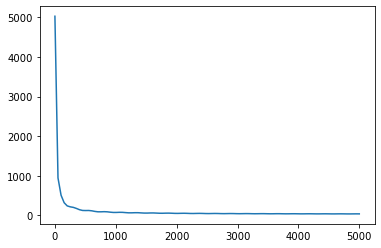

In [23]:
x_range = np.linspace(0, 5000, 100)
y_range = custom(x_range)
plt.plot(x_range, y_range)

In [24]:
vec = np.linspace(0, 6000, 6000)
cooling_custom = custom(vec)
cooling_custom

array([5030.        , 4325.78146131, 3865.4177002 , ...,   38.12069603,
         38.2010905 ,   38.28265498])

In [25]:
SA(x,schwefel,delta,boundary,cooling_custom)

0/6000   temp:5030.000000
500/6000   temp:130.560929
1000/6000   temp:81.953523
1500/6000   temp:65.429068
2000/6000   temp:57.011502
2500/6000   temp:51.835216
3000/6000   temp:48.273721
3500/6000   temp:45.633218
4000/6000   temp:43.571330
4500/6000   temp:41.902181
5000/6000   temp:40.517911
5500/6000   temp:39.352697


{'solution': array([ 423.1653878 ,  -99.28972227,  439.71552238,  -14.66407713,
         239.67723403,  -20.0583951 , -243.75469702,  223.14155351,
        -494.99831244, -497.18099982]),
 'evaluation': 2854.588628521245}

In [26]:
SA(x,schwefel,delta,boundary,cooling_custom)

0/6000   temp:5030.000000
500/6000   temp:130.560929
1000/6000   temp:81.953523
1500/6000   temp:65.429068
2000/6000   temp:57.011502
2500/6000   temp:51.835216
3000/6000   temp:48.273721
3500/6000   temp:45.633218
4000/6000   temp:43.571330
4500/6000   temp:41.902181
5000/6000   temp:40.517911
5500/6000   temp:39.352697


{'solution': array([ 397.73169867, -127.14727917,  435.55592072,   26.33678673,
         221.94295621,   55.71646164, -231.30123687,  175.22989652,
        -443.64652041, -490.97850097]),
 'evaluation': 3409.210329868029}

In [27]:
SA(x,schwefel,delta,boundary,cooling_custom)

0/6000   temp:5030.000000
500/6000   temp:130.560929
1000/6000   temp:81.953523
1500/6000   temp:65.429068
2000/6000   temp:57.011502
2500/6000   temp:51.835216
3000/6000   temp:48.273721
3500/6000   temp:45.633218
4000/6000   temp:43.571330
4500/6000   temp:41.902181
5000/6000   temp:40.517911
5500/6000   temp:39.352697


{'solution': array([ 414.82894887, -112.45889922,  419.18554827,  -13.99563253,
         215.09017801,   46.0804203 , -204.7782639 ,  206.35835534,
        -363.19906447, -499.91044201]),
 'evaluation': 2933.2854598926633}

Using the custom cooling schedule could be more effective than the logarithmic cooling schedule, possibly because it cools fast in the beginning in addition to oscillating with the sin function, but this particular schedule may cool too fast in the beginning although it yields better results than the previous schedules. This could be because he oscillations get smaller as time goes on and the temperature reaches a lower value at the end of the simulation.

In [28]:
#trying a local optimization technique from scipy
import scipy

def BFGS(function, start):
    return scipy.optimize.minimize(function, start, method="BFGS")

previous_optimum = [-355.31801762,  183.5408646 , -211.24573696, -497.09893531,
         -39.65616605,  262.93278375,  442.77127867,  249.94170165,
        -365.6340704 ,  413.95854371]

BFGS(schwefel, previous_optimum)

      fun: 1263.4576564078725
 hess_inv: array([[ 1.48885005e+00, -2.09223443e-01,  4.81324171e-01,
        -4.87040456e-01,  4.22073872e-02,  2.43797288e-03,
        -2.55907412e-01, -3.23662201e-01,  2.47552641e-01,
        -1.24649498e-01],
       [-2.09223443e-01,  2.96771706e+00, -6.89039114e-01,
         7.21679268e-02,  1.62994711e-01,  6.12608305e-01,
        -1.78405639e-01, -3.53693473e-01,  9.35614217e-01,
         9.19930763e-01],
       [ 4.81324171e-01, -6.89039114e-01,  1.65739412e+00,
         2.79603261e-01, -9.53251436e-01, -8.49059284e-01,
         2.33523480e-01,  1.34329315e-02,  1.80082437e-02,
        -3.18502903e-01],
       [-4.87040456e-01,  7.21679268e-02,  2.79603261e-01,
         1.31454987e+00,  1.29787205e-01,  7.74631354e-02,
         1.09089954e-01,  3.48848481e-01, -4.85698402e-01,
         5.08184885e-02],
       [ 4.22073872e-02,  1.62994711e-01, -9.53251436e-01,
         1.29787205e-01,  2.72644824e+00, -4.42588858e-01,
         6.35453832e-02, -5.2

I chose one of the previous solutions from the CSA algorithm with custom cooling and used the BFGS algorithm from scipy to find the minimum, and it was much lower than the previous minimums reported from CSA, evaluating to 1263.457. This is surprising so I wonder if it would be best to always use further optimization after using the CSA algorithm, because it seems that there is no guarantee of finding the minimum with CSA alone.

## Problem 2

### Importing Pandas


In [29]:
import pandas as pd

In [30]:
wines = pd.read_csv('wines.csv')
display(wines)

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,3,3
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,3
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,3
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,3,3


In [31]:
wines.describe()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,2.016854,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.819775,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000,3.000000


### (A)

In [32]:
wines_normalized = (wines - wines.mean())/wines.std()

In [33]:
wines_normalized['Start assignment'] = wines['Start assignment']

In [34]:
wines_normalized = wines_normalized.drop(columns=['ranking'])

In [35]:
display(wines_normalized)

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,1
1,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,1
2,2.253415,-0.623328,-0.716315,-1.645408,-0.191954,0.806722,0.951817,-0.577356,0.679820,0.061213,0.536158,0.335659,0.946649,1
3,1.378844,-0.766550,-0.169557,-0.806975,-0.331985,-0.151973,0.401188,-0.818411,-0.036514,-0.025057,0.929908,0.293405,1.692900,1
4,0.923081,-0.542765,0.158499,-1.046527,-0.752080,0.487157,0.731565,-0.577356,0.382804,0.233755,0.842408,0.406082,1.819921,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.491955,2.026281,1.798775,1.648436,0.858284,-0.503494,-1.070491,-0.738059,-0.840205,1.484679,-1.257591,-0.974218,-0.371199,3
174,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,3
175,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,3
176,1.391162,1.578712,1.361368,1.498716,-0.261969,-0.391646,-1.270720,1.592131,-0.420888,1.786626,-1.520090,-1.424928,-0.593486,3


### (B)

In [36]:
#get the means of each column in the dataframe
means_df = wines_normalized.groupby('Start assignment').mean()
display(means_df)

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
Start assignment,,,,,,,,,,,,,
1,-0.026247,-0.022814,0.039092,-0.011393,0.001194,0.046102,-0.014459,-0.092477,0.015299,-0.122335,0.071956,-0.021072,-0.001085
2,-0.030199,-0.043157,-0.117661,-0.122322,-0.180086,-0.109996,-0.040333,0.035493,-0.146673,-0.217850,0.084570,0.077599,-0.085239
3,0.054165,0.063434,0.076634,0.129144,0.173047,0.062555,0.052758,0.053600,0.127318,0.327026,-0.150214,-0.055018,0.083476


In [37]:
#creating a (3, 13) array with the three centroids
centroids= np.zeros([3, 13])
centroids[0,:] = means_df.iloc[0].to_numpy()
centroids[1, :] = means_df.iloc[1].to_numpy()
centroids[2, :] = means_df.iloc[2].to_numpy()
display(centroids)

#casting "Start assignment" column as nd.array
start = wines['Start assignment'].to_numpy()
display(start)

#casting wines_normalized dataframe to nd.array
feat_array = wines_normalized.drop(columns = 'Start assignment').to_numpy()
display(feat_array)

array([[-0.02624653, -0.02281371,  0.03909152, -0.01139289,  0.00119361,
         0.04610228, -0.01445858, -0.09247727,  0.01529861, -0.12233484,
         0.07195608, -0.02107247, -0.00108455],
       [-0.03019892, -0.04315704, -0.11766091, -0.12232231, -0.18008643,
        -0.1099961 , -0.04033264,  0.03549325, -0.14667323, -0.2178502 ,
         0.08456967,  0.07759861, -0.08523904],
       [ 0.05416451,  0.06343378,  0.07663419,  0.12914432,  0.17304706,
         0.06255472,  0.05275776,  0.05359967,  0.12731805,  0.32702594,
        -0.15021415, -0.05501827,  0.08347553]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

array([[ 1.51434077, -0.56066822,  0.23139979, ...,  0.36115849,
         1.84272147,  1.01015939],
       [ 0.29486844,  0.22705328,  1.83522559, ...,  0.36115849,
         0.44833648, -0.03776747],
       [ 2.25341491, -0.62332789, -0.71631546, ...,  0.53615839,
         0.3356589 ,  0.94664867],
       ...,
       [ 0.20864312,  0.22705328,  0.01269627, ..., -1.56384035,
        -1.39675882,  0.2956638 ],
       [ 1.39116174,  1.57871176,  1.36136797, ..., -1.52009038,
        -1.42492821, -0.59348626],
       [-0.92460389, -0.54276546, -0.89856839, ...,  0.1861586 ,
         0.7863692 , -0.75226305]])

### (C)

In [38]:
#generating two matrices w for the weights and d for the distances
w = np.zeros((feat_array.shape[0], 3))
for i in range(feat_array.shape[0]):
    for j in range(3):
        if start[i] == (j + 1):
            w[i][j] = 1

d = np.zeros((feat_array.shape[0], 3))
for i in range(feat_array.shape[0]):
    for j in range(3):
            d[i][j] = np.linalg.norm(centroids[j] - feat_array[i, :])
#display(w)
#display(d)

#defining cost function
#def cost_function(w, d):
    #summation = 0
    #for i in range(w.shape[0]):
        #for j in range(w.shape[1]):
            #summation += w[i][j] * d[i][j]**2
    #return summation
    
def cost_function(w, d):
    return np.sum(np.multiply(w, d**2))

#evaluating the cost function at the starting vector
print(cost_function(w, d))

np.random.seed(5843922)


        

2275.34927819508


### (D)

In [39]:
def simulated_annealing(feats,ranks,centers,start_temp,alpha,steps=10000):
    """ Simulated Annealing for clustering
    feats: pd.DataFrame. Normalized chemical descriptors
    ranks: np.array shape(178,). Initial assignment.
    centers: np.array shape (3,13). Fixed centers
    start_temp: float. Initial tempreture
    alpha: float. Hyperparameter for geometric cooling
    steps: int. 
    """
    feat_array = feats.to_numpy()
    
    #generating two matrices w for the weights and d for the distances
    w = np.zeros((feat_array.shape[0], 3))
    for i in range(feat_array.shape[0]):
        for j in range(3):
            if start[i] == (j + 1):
                w[i][j] = 1

    d = np.zeros((feat_array.shape[0], 3))
    for i in range(feat_array.shape[0]):
        for j in range(3):
            d[i][j] = np.linalg.norm(centers[j] - feat_array[i][:])
    
    #defining cost function
    def cost_function(w, d):
        return np.sum(np.multiply(w, d**2))
    
    best_rank=ranks.copy()
    # evaluate the cost function with current best rank
    lowest_eval= cost_function(w, d)

    
    temp = start_temp
    k = 1
    w_old = w.copy()
    d_old = d.copy()
    
    for step in (range(steps)):
        # update tempture according to geometric cooling schedule
        temp=alpha*temp
        beta = 1/(k*temp)
        if step%500==0:
            print(step,temp,lowest_eval)
        for n in range(len(ranks)):
            trial=ranks.copy()

            w[n][:] = 0
            rand_choice=np.random.randint(3)+1
            trial[n]=rand_choice
            w[n][rand_choice-1] = 1
            
            for j in range(d.shape[1]):
                d[n][j] = np.linalg.norm(centers[j] - feat_array[n])
                
            # Metropolis acceptance criterion
           
            urn = np.random.random()
        
            p_accept = min(1, math.exp(-beta*(cost_function(w,d) - cost_function(w_old, d_old))))
            #print("cost new = ", cost_function(w, d))
            #print("cost old = " ,cost_function(w_old, d_old))
            #print("p_accept = ",  p_accept)
            #print("urn = ", urn)
            if (p_accept == 1) or (urn < p_accept):
                ranks=trial.copy()
                # update evaluation
                w_old[n][:] = w[n][:].copy()
                d_old[n][:] = d[n][:].copy()
                new_eval= cost_function(w, d)
                #print(new_eval)
                if new_eval<lowest_eval:
                    #update best rank and lowest_eval
                    lowest_eval = new_eval
                    best_rank = ranks.copy()
            else:
                w[n][:] = w_old[n][:].copy()
                d[n][:] = d_old[n][:].copy()
    return {"solution":best_rank,"evaluation":lowest_eval}, best_rank

In [40]:
features_df = wines_normalized.drop(columns='Start assignment')
out, sol = simulated_annealing(feats=features_df,ranks=start,centers=centroids,start_temp=500,alpha=0.999,steps=5000)
print(out)

out, sol = simulated_annealing(feats=features_df,ranks=start,centers=centroids,start_temp=500,alpha=0.999,steps=5000)
print(out)

out, sol = simulated_annealing(feats=features_df,ranks=start,centers=centroids,start_temp=500,alpha=0.999,steps=5000)
print(out)

0 499.5 2275.34927819508
500 302.8862829581618 2273.733200396684
1000 183.6638646730965 2273.733200396684
1500 111.36990046959976 2272.8217041703315
2000 67.53236273605106 2270.440083375998
2500 40.95020285986944 2270.440083375998
3000 24.831340802019085 2268.9892568099967
3500 15.057202235016815 2268.9892568099967
4000 9.130370403830968 2262.3137880390695
4500 5.536464371666806 2253.00868531763
{'solution': array([3, 3, 1, 1, 1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2,
       2, 1, 2, 2, 3, 2, 2, 3, 1, 1, 1, 2, 2, 1, 1, 3, 2, 1, 3, 1, 3, 2,
       1, 2, 2, 2, 3, 1, 3, 2, 2, 3, 2, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3,
       3, 3, 1, 1, 1, 1, 2, 1, 3, 3, 1, 3, 2, 1, 2, 2, 2, 2, 1, 3, 1, 2,
       2, 1, 3, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 1, 3, 2, 1,
       3, 3, 2, 3, 1, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 1, 1, 3, 1, 2, 3, 1,
       1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 1,
    

The algorithm finds three minimum {2241.1 2232.1, 2236.6}  with each subsequent run of the program. I found the value of k to be important when tuning the Metropolis criteria to allow for some uphill moves while mostly accepting downhill moves with greater probability. Through trial and error I found a value of k less than one would result in less probability of an uphill move, but with k=1 the algorithm still works but introduces more random variation in the direction of the moves.

In [41]:
def validate(solution,df):
    """Prints out how many wines are corretly assigned to its cultivar
    solution: np.array shape(178,). Your solution.
    df: pd.DataFrame. Read-in of the wines.csv dataset
    """
    # correct classification
    ranking = df['ranking'].values
    cluster_1 = list(df[df['ranking']==1].index)
    cluster_2 = list(df[df['ranking']==2].index)
    cluster_3 = list(df[df['ranking']==3].index)
    clusters =[cluster_1,cluster_2,cluster_3]

    for i in range(1,4):
        #loop over solutions
        counts=[]
        scores=[]
        for j in range(3):
            #loop over clusters of true assignments
            sol_i= [idx for idx,k in enumerate(solution) if k==i]
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1]/len(clusters[j]))
        idx = np.argmax(scores)
        print(f'Class {i} - cultivar {idx+1}: {counts[idx]} out \
of {len(clusters[idx])} are classified correctly')

In [42]:
validate(sol, wines)

Class 1 - cultivar 2: 22 out of 71 are classified correctly
Class 2 - cultivar 2: 36 out of 71 are classified correctly
Class 3 - cultivar 3: 25 out of 48 are classified correctly


In [43]:
validate(start, wines)

Class 1 - cultivar 1: 20 out of 59 are classified correctly
Class 2 - cultivar 2: 25 out of 71 are classified correctly
Class 3 - cultivar 3: 19 out of 48 are classified correctly


There is an error in the validate function as it reports the cultivar 2 twice but I can still see the results. By comparing the groupings of the start vector to the groupings of the solution vector it is clear that the clustering has improved after running the Simulated Annealing algorithm. The third solution is more accurate in every cluster: the first cluster has classified 37% of the wines correctly, the second cluster has classified 51% correctly, and the third cluster has classified 52% correctly. The first cluster is only marginally better than the initial clustering, but the second and third are at least 50% correct which is an improvement over the 1/3 which would be expected from a purely random selection.

### (E)

In [44]:
def simulated_annealing_2(feats,ranks,centers,start_temp,alpha,steps=10000):
    """ Simulated Annealing for clustering
    feats: pd.DataFrame. Normalized chemical descriptors
    ranks: np.array shape(178,). Initial assignment.
    centers: np.array shape (3,13). Fixed centers
    start_temp: float. Initial tempreture
    alpha: float. Hyperparameter for geometric cooling
    steps: int. 
    """
    feat_array = feats.to_numpy()
    
    #generating two matrices w for the weights and d for the distances
    w = np.zeros((feat_array.shape[0], 3))
    for i in range(feat_array.shape[0]):
        for j in range(3):
            if start[i] == (j + 1):
                w[i][j] = 1

    d = np.zeros((feat_array.shape[0], 3))
    for i in range(feat_array.shape[0]):
        for j in range(3):
            d[i][j] = np.linalg.norm(centers[j] - feat_array[i][:])
    
    #defining cost function
    def cost_function(w, d):
        return np.sum(np.multiply(w, d**2))
    
    best_rank=ranks.copy()
    # evaluate the cost function with current best rank
    lowest_eval= cost_function(w, d)

    
    temp = start_temp
    k = 1
    w_old = w.copy()
    d_old = d.copy()
    for step in (range(steps)):
        # update tempture according to geometric cooling schedule
        temp=alpha*temp
        beta = 1/(k*temp)
        #create a new center to update with random walk
        new_center = centers.copy()
        new_ranks = ranks.copy()
        if step%500==0:
            print(step,temp,lowest_eval)
            
        for n in range(3):
            for i in range((feat_array.shape[1])):
                new_center[n][i] = new_center[n][i] + (2*(np.random.random()) - 1) * 0.01
        
        #reassign ranks of each wine
        for wine in range(feat_array.shape[0]):
            dist_1 = np.linalg.norm(new_center[0] - feat_array[wine])
            dist_2 = np.linalg.norm(new_center[1] - feat_array[wine])
            dist_3 = np.linalg.norm(new_center[2] - feat_array[wine])
            
            if (dist_1 < dist_2) and (dist_1 < dist_3):
                new_ranks[wine] = 1
                w[wine][:] = 0
                w[wine][0] = 1
                d[wine][0] = dist_1
                d[wine][1] = dist_2
                d[wine][2] = dist_3
            elif (dist_2 < dist_1) and (dist_2 < dist_3):
                new_ranks[wine] = 2
                w[wine][:] = 0  
                w[wine][1] = 1
                d[wine][0] = dist_1
                d[wine][1] = dist_2
                d[wine][2] = dist_3
            elif (dist_3 < dist_1) and (dist_3 < dist_2):
                new_ranks[wine] = 3
                w[wine][:] = 0
                w[wine][2] = 1
                d[wine][0] = dist_1
                d[wine][1] = dist_2
                d[wine][2] = dist_3
                
            # Metropolis acceptance criterion
        urn = np.random.random()
        
        p_accept = min(1, math.exp(-beta*(cost_function(w,d) - cost_function(w_old, d_old))))
        #print("cost new = ", cost_function(w, d))
        #print("cost old = " ,cost_function(w_old, d_old))
        #print("p_accept = ",  p_accept)
        #print("urn = ", urn)
            
        if (p_accept == 1) or (urn < p_accept):
            ranks=new_ranks.copy()
            # update evaluation
            w_old = w.copy()
            d_old = d.copy()
            new_eval= cost_function(w, d)
            centers = new_center.copy()
            #print(new_eval)
                
            if new_eval<lowest_eval:
                #update best rank and lowest_eval
                lowest_eval = new_eval
                best_rank = ranks.copy()
        else:
            w = w_old.copy()
            d = d_old.copy()
            
    return {"solution":best_rank,"evaluation":lowest_eval}, best_rank

In [45]:
out, sol2 = simulated_annealing_2(feats=features_df,ranks=start,centers=centroids,start_temp=500,alpha=0.999,steps=10000)

0 499.5 2275.34927819508
500 302.8862829581618 2118.350233619428
1000 183.6638646730965 2115.375247508653
1500 111.36990046959976 2115.375247508653
2000 67.53236273605106 2115.375247508653
2500 40.95020285986944 2115.375247508653
3000 24.831340802019085 2102.4857292331694
3500 15.057202235016815 2036.6425407664594
4000 9.130370403830968 1984.581469557781
4500 5.536464371666806 1926.0076068330459
5000 3.357195423952863 1812.5476196668833
5500 2.035732618869333 1719.9447777939356
6000 1.2344253974494832 1675.2017395454268
6500 0.7485295700152664 1627.2186727055755
7000 0.4538925708632541 1551.6584533997004
7500 0.27523089820039054 1412.4500090111542
8000 0.1668942216439489 1309.83022368908
8500 0.1012011420238866 1274.6113344966948
9000 0.061366241719191236 1271.6309013872722
9500 0.037211196903779574 1271.6309013872722


In [46]:
print("Starting Classification")
validate(start,wines)
print("CSA Solution Classification")
validate(sol2, wines)

Starting Classification
Class 1 - cultivar 1: 20 out of 59 are classified correctly
Class 2 - cultivar 2: 25 out of 71 are classified correctly
Class 3 - cultivar 3: 19 out of 48 are classified correctly
CSA Solution Classification
Class 1 - cultivar 1: 59 out of 59 are classified correctly
Class 2 - cultivar 3: 48 out of 48 are classified correctly
Class 3 - cultivar 2: 65 out of 71 are classified correctly


In [47]:
out, sol2 = simulated_annealing_2(feats=features_df,ranks=start,centers=centroids,start_temp=500,alpha=0.999,steps=10000)

0 499.5 2275.34927819508
500 302.8862829581618 2125.554208891052
1000 183.6638646730965 2125.554208891052
1500 111.36990046959976 2107.3954115468764
2000 67.53236273605106 2107.3954115468764
2500 40.95020285986944 2107.3954115468764
3000 24.831340802019085 2107.3954115468764
3500 15.057202235016815 2107.3954115468764
4000 9.130370403830968 2107.3954115468764
4500 5.536464371666806 2107.3954115468764
5000 3.357195423952863 2107.3954115468764
5500 2.035732618869333 2056.6811823155203
6000 1.2344253974494832 1894.8563634916263
6500 0.7485295700152664 1679.7681084051744
7000 0.4538925708632541 1524.9343353554589
7500 0.27523089820039054 1379.6220307360586
8000 0.1668942216439489 1291.6897150219866
8500 0.1012011420238866 1272.1563964602485
9000 0.061366241719191236 1272.0828450151212
9500 0.037211196903779574 1271.4544238969186


In [48]:
print("Starting Classification")
validate(start,wines)
print("CSA Solution Classification")
validate(sol2, wines)

Starting Classification
Class 1 - cultivar 1: 20 out of 59 are classified correctly
Class 2 - cultivar 2: 25 out of 71 are classified correctly
Class 3 - cultivar 3: 19 out of 48 are classified correctly
CSA Solution Classification
Class 1 - cultivar 2: 65 out of 71 are classified correctly
Class 2 - cultivar 3: 48 out of 48 are classified correctly
Class 3 - cultivar 1: 59 out of 59 are classified correctly


In [49]:
out, sol2 = simulated_annealing_2(feats=features_df,ranks=start,centers=centroids,start_temp=500,alpha=0.999,steps=10000)

0 499.5 2275.34927819508
500 302.8862829581618 2101.346116346665
1000 183.6638646730965 2101.346116346665
1500 111.36990046959976 2101.346116346665
2000 67.53236273605106 2101.346116346665
2500 40.95020285986944 2101.346116346665
3000 24.831340802019085 2101.346116346665
3500 15.057202235016815 2101.346116346665
4000 9.130370403830968 2101.346116346665
4500 5.536464371666806 2101.346116346665
5000 3.357195423952863 1993.5142221799504
5500 2.035732618869333 1816.4822191436033
6000 1.2344253974494832 1620.9696739437027
6500 0.7485295700152664 1469.2205877059414
7000 0.4538925708632541 1355.9460270404759
7500 0.27523089820039054 1293.464619448167
8000 0.1668942216439489 1274.9698510268581
8500 0.1012011420238866 1272.3461711925434
9000 0.061366241719191236 1271.7231984779783
9500 0.037211196903779574 1271.2282720658663


In [50]:
print("Starting Classification")
validate(start,wines)
print("CSA Solution Classification")
validate(sol2, wines)
print('Solution 2')
print(sol2)
print('Wine rankings')
print(wines['ranking'].to_numpy())

Starting Classification
Class 1 - cultivar 1: 20 out of 59 are classified correctly
Class 2 - cultivar 2: 25 out of 71 are classified correctly
Class 3 - cultivar 3: 19 out of 48 are classified correctly
CSA Solution Classification
Class 1 - cultivar 1: 59 out of 59 are classified correctly
Class 2 - cultivar 2: 65 out of 71 are classified correctly
Class 3 - cultivar 3: 48 out of 48 are classified correctly
Solution 2
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2 2 1 2 2 2 3 2 2 2
 2 2 2 2 2 2 1 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2]
Wine rankings
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

By examining the solution vector proposed by the algorithm, it seems that the model does not differentiate between the three values for ranking. I notice that on some iterations it has grouped the three clusters together correctly but has labeled them different values for ranking, resulting all the wines of rank 2 to be classified as 1.

This algorithm is an improvement over the previous version, so it seems that by randomly varying the mean centroid vector, the algorithm has found the most effective grouping by putting all wines into the cluster based on the distance to the centroid. However, I wonder if this is an example of overfitting, because we have come very close to the true clusters as given by the column 'ranking'. Also, this model does not allow us to plug in a value for an arbitrary wine's features and then predict the ranking - instead, the algorithm simply groups the data given into the most valid collection of clusters, which is why the # ranking of cluster 1 and 2 have been switched somewhere in the process. The algorithm is very accurate because although the starting vector was basically a random grouping, the random walk has found three centroids which represent the center of the clusters and minimize the cost function.